# Estudio de retención - Averiguar qué empleados pueden renunciar
### Cargando nuestros registros de la base de datos principal de recursos humanos

In [1]:
# Importar el dataset
import pandas as pd

hr_df = pd.read_csv('hr_data.csv')

hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [2]:
# Ver las 5 filas inferiores
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [3]:
# Ver la información del dataset
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [4]:
# Ver qué columnas son categóricas
hr_df.select_dtypes(include=['object']).columns

Index(['department', 'salary'], dtype='object')

In [5]:
# Mostrar las categorías en de las variables categóricas
print(hr_df['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [6]:
# ¿Cuántas filas hay en nuestro conjunto de datos?
print(hr_df.shape)


(14999, 9)


In [7]:
# ¿Cuantas cuántas columnas hay en el conjunto de datos?
num_columns = hr_df.shape[1]
print("Number of columns:", num_columns)


Number of columns: 9


In [8]:
# utiliza la función shape para ver (renglones,columnas)
print(hr_df.shape)


(14999, 9)


### Cargar los datos de Evaluación y Satisfacción de los Empleados

In [2]:

emp_satis_eval = pd.read_excel('employee_satisfaction_evaluation.xlsx')

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [3]:
# Ver cuantos renglones y columnas tiene el dataset (renglones,columnas)
num_rows, num_columns = emp_satis_eval.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 14999
Number of columns: 3


### Combinar o unir tablas

In [47]:
# utiliza el método join para unir los dos conjuntos de datos
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
# Restablece el índice del nuevo dataset
main_df = main_df.reset_index()

main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


### ¿Es bueno nuestro conjunto de datos? ¿Hay valores perdidos?

In [48]:
# muestra los registros del dataset con valores nulos
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


### Rellenemos los espacios en blanco que faltan con los valores medios

In [6]:
# Usar los estadísticos descriptivos básicos
main_df.describe()


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Corregir los espacios en blanco con el promedio de las columnas satisfaction_level y last_evaluation
main_df['satisfaction_level'].fillna(main_df['satisfaction_level'].mean(), inplace=True)
main_df['last_evaluation'].fillna(main_df['last_evaluation'].mean(), inplace=True)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_13616\3353127639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['satisfaction_level'].fillna(main_df['satisfaction_level'].mean(), inplace=True)
C:\Users\Adrian\AppData\Local\Temp\ipykernel_13616\3353127639.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [16]:
# ver los primeros cinco renglones del dataset
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [50]:
# Eliminar employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [51]:
# Agrupar el dataset por departamento y realizar agregación con la función suma
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,4683,248119,4256,164,273,3,mediummediummediummediummediummediumlowlowlowl...,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,mediummediummediummediummediummediummediummedi...,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,lowlowlowlowmediummediummediumlowmediummediumm...,446.68283,550.706125
hr,2701,146828,2480,89,215,15,lowlowlowlowmediummediummediumhighmediummedium...,442.53566,524.006125
management,2432,126787,2711,103,91,69,mediumlowlowlowlowlowlowmediumlowmediumlowlowl...,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,mediumlowlowlowlowlowlowlowlowlowlowlowlowlowl...,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,mediummediummediummediummediumhighlowmediummed...,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,lowmediummediumlowlowlowlowlowlowlowlowlowlowl...,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,lowlowlowlowlowlowlowlowlowlowlowlowlowlowlowl...,1377.90849,1611.534499


In [25]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [20]:
# Mostrar la cuenta de filas de cada categoría de la columna departament
main_df_final['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [21]:
# Mostrar la cuenta de filas de cada categoría de la columna left
main_df_final['left'].value_counts()


left
0    11428
1     3571
Name: count, dtype: int64

### Visualización de la matriz de correlación

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


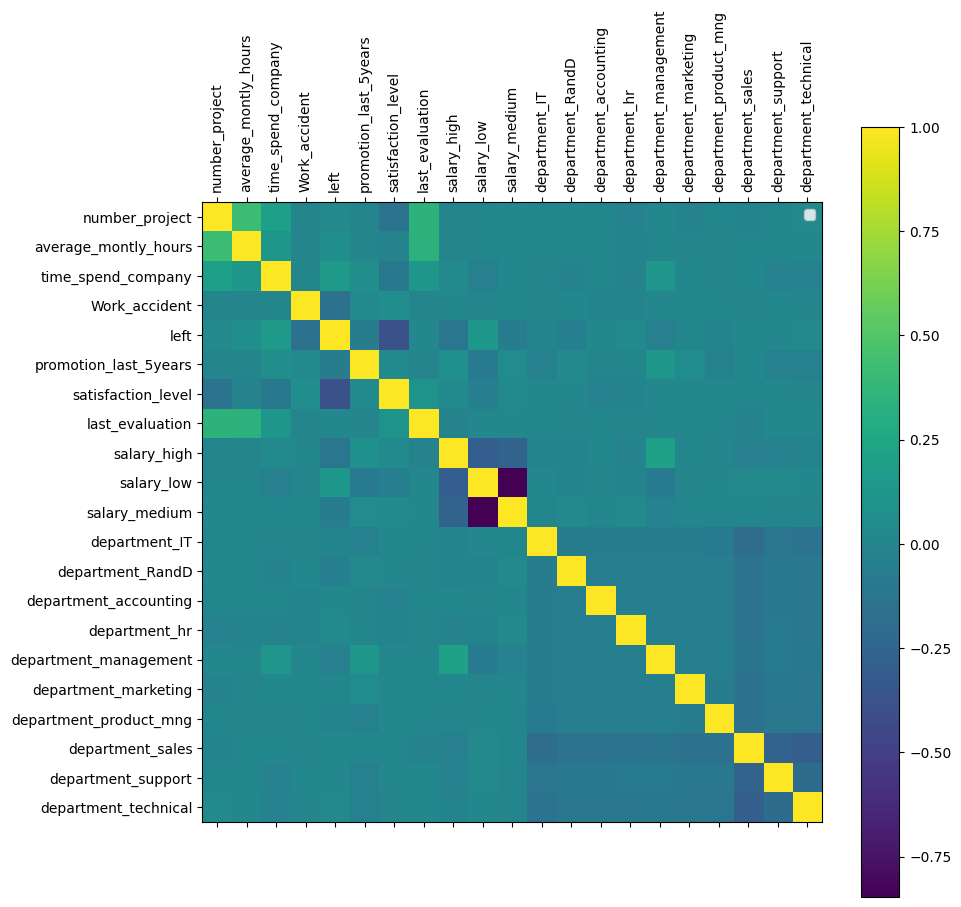

In [30]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''La función traza una matriz de correlación gráfica para cada par de columnas en el marco de datos.

     Input:
         df: marco de datos de pandas
         size: tamaño vertical y horizontal de la parcela'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(main_df_final)

## Preparar el conjunto de datos para ML

In [52]:
# Convertir en variables indicadores (dummy) las variables categóricas
main_df_final = pd.get_dummies(main_df_final, columns=['department'])

In [34]:
# ¿Cuántas columnas tenemos ahora?
num_columns = main_df_final.shape[1]
print("Number of columns:", num_columns)


Number of columns: 21


In [36]:
# ¿Cuántos empleados del conjunto de datos se han ido?
left_count = len(main_df_final[main_df_final['left'] == 1])
print("Number of employees who left:", left_count)


Number of employees who left: 3571


In [37]:
# mostar el dataset final
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_high,salary_low,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,2,157,3,0,1,0,0.38,0.53,False,True,...,False,False,False,False,False,False,False,True,False,False
1,5,262,6,0,1,0,0.80,0.86,False,False,...,False,False,False,False,False,False,False,True,False,False
2,7,272,4,0,1,0,0.11,0.88,False,False,...,False,False,False,False,False,False,False,True,False,False
3,5,223,5,0,1,0,0.72,0.87,False,True,...,False,False,False,False,False,False,False,True,False,False
4,2,159,3,0,1,0,0.37,0.52,False,True,...,False,False,False,False,False,False,False,True,False,False


In [38]:
# Utiliza la función info() para ver a detalle el dataset
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   salary_high             14999 non-null  bool   
 9   salary_low              14999 non-null  bool   
 10  salary_medium           14999 non-null  bool   
 11  department_IT           14999 non-null  bool   
 12  department_RandD        14999 non-null  bool   
 13  department_accounting   14999 non-null  bool   
 14  department_hr           14999 non-null

## Conjunto de entrenamiento y prueba

In [42]:
# importa las librerias
from sklearn.model_selection import train_test_split


# Conjunto de características de entrada (variables independientes)
X = main_df_final.drop(['left'], axis=1)


# Variable objetivo (variable dependiente)
y = main_df_final['left']

In [43]:
# Conjunto de entrenamiento y prueba a razón de 70:30 (Train:Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

# importar la libreria StandarScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
# convertir a dataframe X_train
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_high,salary_low,salary_medium,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,2.587060,0.983762,0.340625,-0.413022,-0.148657,-2.063240,0.721656,-0.299455,1.029092,-0.872176,-0.297941,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,3.854804,-0.62262,-0.41397,-0.467036
1,0.159755,-0.940732,-0.343557,2.421176,-0.148657,-0.175855,-0.213024,-0.299455,-0.971730,1.146558,-0.297941,-0.233765,-0.232629,-0.222206,4.578694,-0.241151,-0.259417,-0.62262,-0.41397,-0.467036
2,-1.458448,-0.940732,-0.343557,-0.413022,-0.148657,-0.898683,-1.381375,-0.299455,1.029092,-0.872176,-0.297941,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,2.141162
3,0.159755,-1.381761,0.340625,-0.413022,-0.148657,1.189488,-0.213024,-0.299455,-0.971730,1.146558,3.356365,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,-0.467036
4,0.968857,1.244370,1.024807,-0.413022,-0.148657,0.828074,1.481084,-0.299455,-0.971730,1.146558,-0.297941,-0.233765,-0.232629,-0.222206,-0.218403,-0.241151,-0.259417,-0.62262,-0.41397,2.141162


### ¿Puede el aprendizaje profundo marcar la diferencia?

El aprendizaje profundo puede marcar la diferencia ya que este tipo de aprendizaje se basa en la estructura de la red neuronal, que es similar a la estructura del cerebro humano. En este caso, el aprendizaje profundo puede ayudar a predecir si un empleado renunciará o no. También puede ayudar a predecir cuántos empleados renunciarán en el futuro.